In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('laptop_clean.csv')
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned,Screen-Full-HD,Screen-IPS-Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,low,0,1
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,low,1,0
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,low,1,0
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low,0,1
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,low,1,0


In [ ]:
#Generate regression plots for each of the parameters "Category" "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". 

(0.0, 3974.15)

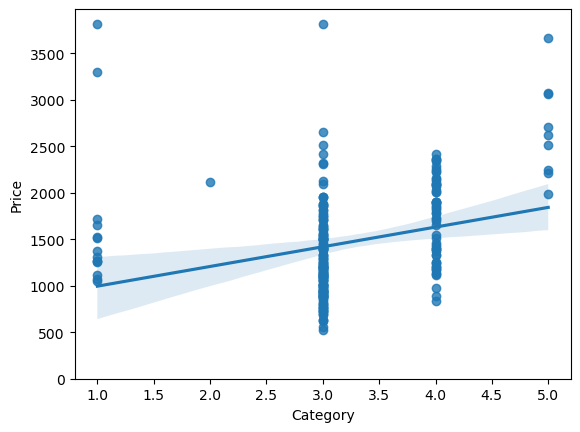

In [59]:
#  Category plot
sns.regplot(x='Category',y='Price',data=df)
plt.ylim(0,)

(0.0, 3974.15)

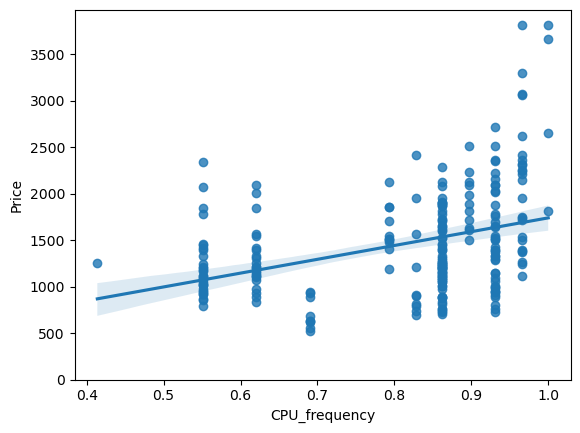

In [8]:
# CPU_frequency plot
sns.regplot(x='CPU_frequency',y='Price',data=df)
plt.ylim(0,)


(0.0, 3974.15)

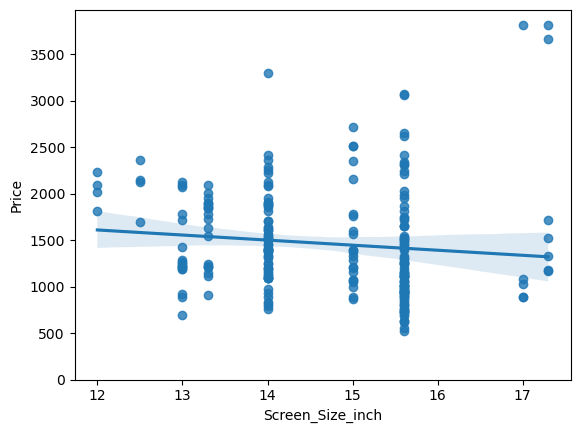

In [14]:
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch',y='Price',data=df)
plt.ylim(0,)

(0.0, 3974.15)

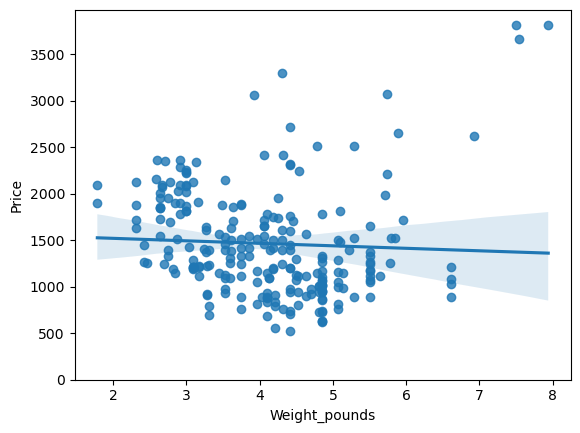

In [13]:
# Weight_pounds plot
sns.regplot(x='Weight_pounds',y='Price',data=df)
plt.ylim(0,)

In [20]:
for x in ['CPU_frequency','Screen_Size_inch','Weight_pounds']:
     print(f"Correlation of Price and {x} is ", df[[x,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='GPU', ylabel='Price'>

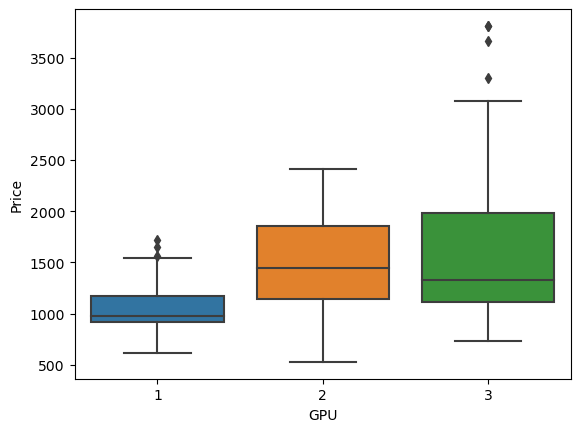

In [21]:
# GPU Box plot 
sns.boxplot(x='GPU',y='Price',data=df)

<Axes: xlabel='OS', ylabel='Price'>

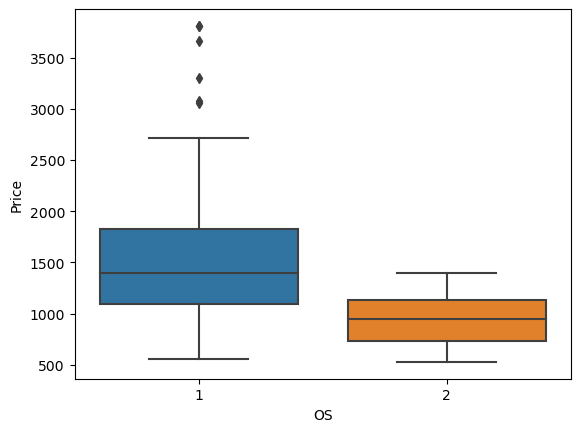

In [22]:
sns.boxplot(x='OS',y='Price',data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

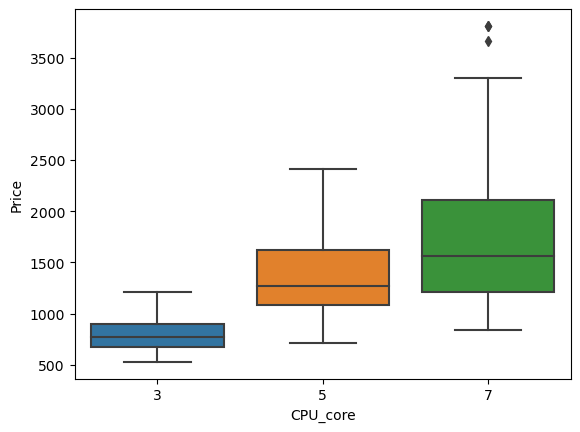

In [23]:
sns.boxplot(x='CPU_core',y='Price',data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

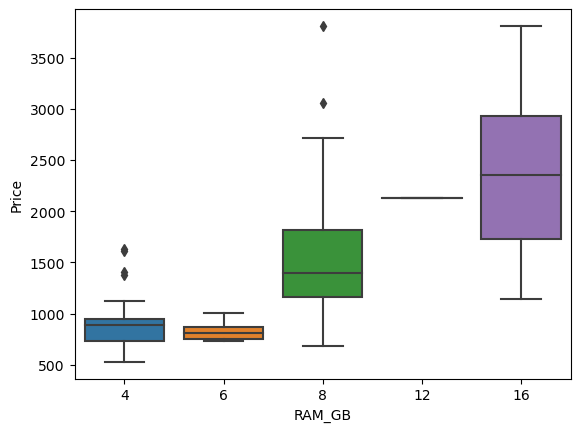

In [24]:

sns.boxplot(x='RAM_GB',y='Price',data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

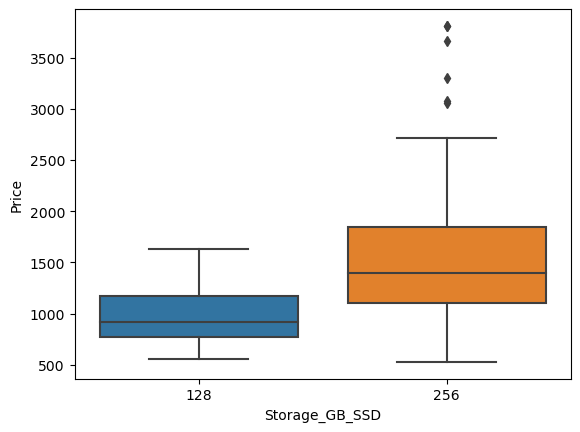

In [25]:
sns.boxplot(x='Storage_GB_SSD',y='Price',data=df)

In [28]:
df.describe(include='all')

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned,Screen-Full-HD,Screen-IPS-Panel
count,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN
freq,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [27]:
df.describe(include='object')

,Manufacturer,price_binned
count,238,238
unique,11,3
top,Dell,low
freq,71,160


In [32]:
#create group
df_group_one=df[['GPU','CPU_core','Price']]
df_group_one=df_group_one.groupby(['GPU','CPU_core'],as_index=False).mean()
df_group_one

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [33]:
#create pivot table
grouped_pivot=df_group_one.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

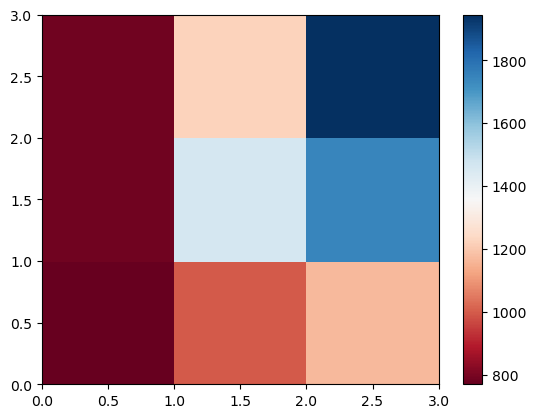

In [39]:
#creat heat map
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

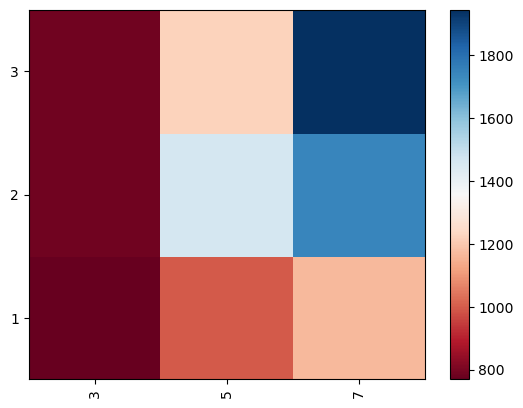

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
col_labels = grouped_pivot.columns.levels[1]
row_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(col_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [58]:
#evaluate the Pearson Coefficient and the p-values

for y in ['Category','GPU','OS','CPU_core' ,'Screen_Size_inch' ,'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD' ,'Weight_pounds']:
    pearson_coef,p_value=stats.pearsonr(df[y],df['Price'])
    print(y)
    print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

       

Category
Pearson Correlation Coefficient is= 0.2862427558126413  with P-value is= 7.225696235806733e-06
GPU
Pearson Correlation Coefficient is= 0.2882981988881428  with P-value is= 6.166949698364282e-06
OS
Pearson Correlation Coefficient is= -0.2217298011482738  with P-value is= 0.0005696642559246759
CPU_core
Pearson Correlation Coefficient is= 0.45939777733551157  with P-value is= 7.912950127009034e-14
Screen_Size_inch
Pearson Correlation Coefficient is= -0.11056471275425062  with P-value is= 0.08876456732700737
CPU_frequency
Pearson Correlation Coefficient is= 0.36666555892588604  with P-value is= 5.5024633507134225e-09
RAM_GB
Pearson Correlation Coefficient is= 0.5492972971857841  with P-value is= 3.6815606288429613e-20
Storage_GB_SSD
Pearson Correlation Coefficient is= 0.2434207552181029  with P-value is= 0.00014898923191724174
Weight_pounds
Pearson Correlation Coefficient is= -0.05031225837751549  with P-value is= 0.4397693853433899
